# CS5489 - Machine Learning
# Lecture 8b - Neural Networks
## Dr. Antoni B. Chan
### Dept. of Computer Science, City University of Hong Kong

In [1]:
# setup
%matplotlib inline
import IPython.core.display         # setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats

rbow = plt.get_cmap('rainbow')

# Outline
- History
- Perceptron
- Multi-class logistic regression
- **Multi-layer perceptron (MLP)**

# Extracting features
- The multi-class logistic regression model assumes the inputs are feature vectors.
  - $\mathbf{g} = \mathbf{W}^T\mathbf{x}$
  - $\mathbf{f} = \mathbf{s}(\mathbf{g})$

<center><img src="imgs/mclr.png" width=300></center>

- What if we also want to learn the feature vectors?
  - Replace $\mathbf{x}$ with a feature extractor.
  - For simplicity, we can reuse the same "unit" as the classifier to compute the "features".

- Replace $\mathbf{x}$ with feature extractor $\mathbf{z}=\sigma(\mathbf{A}^T\mathbf{x})$
  - $\mathbf{z}$ is the extracted feature vector (also called *hidden* nodes)
    - $z_i = \sigma(\mathbf{a}_i^T \mathbf{x})$ is a  hidden node.
  - $\sigma()$ is the sigmoid function (also called *activation* function.)
  - $\mathbf{A}$ are the parameters of the feature extractor.

- New model 
  - $\mathbf{z} = \sigma(\mathbf{A}^T\mathbf{x})$
  - $\mathbf{g} = \mathbf{W}^T\mathbf{z}$
  - $\mathbf{f} = \mathbf{s}(\mathbf{g})$
<center><img src="imgs/nn.png" width=450></center>

- **Interpretation**
  - Each hidden node $z_i$ is a "classifier" looking for pattern based on $\mathbf{a}_i$.
  - The output is looking for patterns in the vector $\mathbf{x}$
  - the effect is a non-linear classifier in the input space of $\mathbf{x}$.
<center><img src="imgs/features.png" width=800></center>
  - we can apply this recursively to create features of features ...

# Multi-layer Perceptron
- Add hidden layers between the inputs and outputs
  - each hidden node is a Perceptron (with its own set of weights)
    - its inputs are the outputs from previous layer
    - extracts a feature pattern from the previous layer
  - can model more complex functions

<center><table border=0><tr><td><img src="imgs/neural_net.jpeg" width=350></td><td><img src="imgs/neural_net2.jpeg" width=350></tr></table></center>

- Formally, for one layer: 
  - $\mathbf{h} = f(\mathbf{W}^T \mathbf{x})$
    - Weight matrix $\mathbf{W}$ - one column for each node
    - Input $\mathbf{x}$ - from previous layer
    - Output $\mathbf{h}$ - to next layer
    - $f(a)$ is the activation function - applied to each dimension to get output
- Also called _fully-connected layers_ or _dense layers_

# Activation functions
- There are different types of activation functions:
  - _Sigmoid_ - output [0,1]
  - _Tanh_ - output [-1,1]
  - _Rectifier Linear Unit (ReLU)_ - output [0,$\infty$]


In [2]:
x=linspace(-5,5,200)
fs = {'Sigmoid': lambda x: 1/(1+exp(-x)),
      'Tanh':    lambda x: tanh(x),
      'ReLU':    lambda x: maximum(0,x),
     }

actfig = plt.figure()
for name,f in fs.items():
    plt.plot(x, f(x), label=name)
plt.legend(loc="lower right")
plt.axis([-5,5,-2,2])
plt.grid(True)
plt.close()


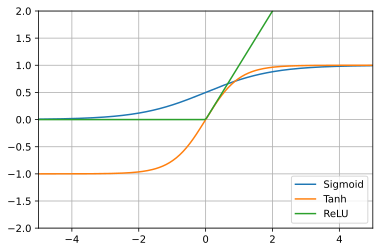

In [3]:
actfig

- Activation functions specifically for output nodes:
  - _Linear_ - output for regression
  - _Softmax_ - output for classification (same as multi-class logistic regression)
  
- Each layer can use a different activation function.

# Which activation function is best?
- In the early days, only the Sigmoid and Tanh activation functions were used.
  - these were notoriously hard to train with.
    - gradient decays to zero on both ends
- Recently, ReLU has become very popular.
  - easier to train with - gradient is either 0 or 1.
  - faster - don't need to calculate exponential
  - sparse representation - most nodes will output zero.
  

# Training an MLP
- Assume a general case:
  - linear transform: $\mathbf{g}_1 = \mathbf{A}^T\mathbf{x}$
  - activation: $\mathbf{z} = h_1(\mathbf{g}_1)$
  - linear transform: $\mathbf{g}_2 = \mathbf{W}^T\mathbf{z}$
  - activation: $\mathbf{f} = h_2(\mathbf{g}_2)$
  - loss function: $L(\mathbf{y}, \mathbf{f})$

<center><img src="imgs/nn2.png" width=450></center>

- In our example, $h_1$ is a  sigmoid, $h_2$ is a softmax.

- Similar to multi-class logistic regression
  - minimize the loss
    - $(\mathbf{A}^*,\mathbf{W}^*) = \mathop{\mathrm{argmin}}_{\mathbf{A}, \mathbf{W}} L(\mathbf{y}, \mathbf{f}(\mathbf{x}))$
  - use gradient descent as before
    - need to compute $\frac{dL}{d\mathbf{A}}$  and $\frac{dL}{d\mathbf{W}}$
    - we have done most of the work already...

- Computation graph
<center><img src="imgs/nn3.png" width=450></center>

- Chain rule:
  - 1) $\color{red}{\frac{dL}{d\mathbf{f}}}$
  - 2) $\color{blue}{\frac{dL}{d\mathbf{g}_2}} = \frac{d\mathbf{f}^T}{d\mathbf{g}_2} \color{red}{\frac{dL}{d\mathbf{f}}}$ $\Rightarrow$  3)$\color{magenta}{\frac{dL}{d \mathbf{w}_j}} = \frac{d\mathbf{g}_2^T}{d\mathbf{w}_j} \color{blue}{\frac{dL}{d\mathbf{g}_2}}$
  - 4) $\color{green}{\frac{dL}{d\mathbf{z}}} = \frac{d\mathbf{g}_2^T}{d\mathbf{z}} \color{blue}{\frac{dL}{d\mathbf{g}_2}}$
  - 5) $\color{purple}{\frac{dL}{d\mathbf{g}_1}} = \frac{d\mathbf{z}^T}{d\mathbf{g}_1} \color{green}{\frac{dL}{d\mathbf{z}}}$ $\Rightarrow$  6) $\color{orange}{\frac{dL}{d \mathbf{a}_j}} = \frac{d\mathbf{g}_1^T}{d\mathbf{a}_j} \color{purple}{\frac{dL}{d\mathbf{g}_1}}$

- Recursively use the gradient of descendant layers
  - propagate gradient backwards 
  - backwards propagation
  - back propagation 
  - backpropagation 
  - backprop
  - BP

# Backpropagation (backward propagation)
- Defines a set of recursive relationships
  - 1) calculate the output of each node from first to last layer
  - 2) calculate the gradient of each node from last to first layer
<center><img src="imgs/BP.png" width="100%"></center>

- **NOTE:** the gradients multiply in each layer!
  - if two gradients are small (<1), their product will be even smaller.  This is the "vanishing gradient" problem.



# Backpropagation (general form)
- Given a computation graph
  - 1) apply input $\mathbf{x}$ and forward propagate to compute all the nodes' values and the loss.
  - 2) Go backwards from end, at node $\mathbf{h}$:
    - compute gradients from child nodes: $\frac{dL}{d\mathbf{h}} = \sum_{g\in \mathrm{child}(\mathbf{h})} \frac{d\mathbf{g}^T}{d\mathbf{h}} \frac{dL}{d\mathbf{g}}$
    - compute gradient of parameters $\mathbf{w}_h$ of $h$:  $\frac{dL}{d\mathbf{w}_h} =  \frac{d\mathbf{h}^T}{d\mathbf{w}_h} \frac{dL}{d\mathbf{h}}$
- This is the "symbol-to-number" differentiation (e.g., Caffe, Torch).

<center><img src="imgs/compgraph.png" width=400></center>

- We can also make the backprop operations as part of the computation graph.
  - called "symbol-to-symbol" differentiation (e.g., Tensorflow, Theano)
  
<center><img src="imgs/compgraph2.png" width=400></center>

# Stochastic Gradient Descent (SGD)
- The datasets needed to train NN are typically very large
- Use SGD so that only a small portion of the dataset is needed at a time
  - Each small portion is called a _mini-batch_
  - Use a _momentum_ term, which averages the current gradient with those from previous mini-batches.
  - One complete pass through the data is called an _epoch_.

# Monitoring training with SGD
- Separate the training set into training and validation
  - use the training set to run backpropagation
  - test the NN on the validation set for diagnostics
    - check for convergence - adjust learning rate if necessary
    - check for diverging loss - adjust learning rate
    - stopping criteria - stop when no change in the validation error.
    - decay learning rate after each epoch.

# Load NN software
- We will use _keras_
  - compatible with scikit-learn
  - keras is an easy-to-use front-end for Tensorflow
  - (slides are using Tensorflow 2.4)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
import struct

In [5]:
#import warnings
#warnings.filterwarnings('ignore')

In [6]:
print(keras.__version__, tf.__version__)

2.4.0 2.4.1


In [7]:
# type three - moons
X0,Y = datasets.make_moons(n_samples=100,
                                            noise=0.1, random_state=4487)
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap', ["#FF0000", "#FFFFFF", "#00FF00"])

scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = scaler.fit_transform(X0)

axbox = [-1.2, 1.2, -1.2, 1.2]

In [8]:
def plot_nn(model, axbox, X, Y, mode="prob"):
    # assumes a sigmoid output node
    # grid points
    xr = [ linspace(axbox[0], axbox[1], 200), 
           linspace(axbox[2], axbox[3], 200) ]

    # make a grid for calculating the posterior, 
    #  then form into a big [N,2] matrix
    xgrid0, xgrid1 = meshgrid(xr[0], xr[1])
    allpts = c_[xgrid0.ravel(), xgrid1.ravel()]

    # calculate the decision function
    if mode == "prob":
        #scoreall = model.predict_proba(allpts) # tf1
        scoreall = model.predict(allpts)
        score = scoreall[:,1].reshape(xgrid0.shape)
        maxscore = 1.0
        minscore = 0.0
        al = 0.3
        
    elif mode == "predict":
        #score = model.predict_classes(allpts).reshape(xgrid0.shape) # tf1
        cl = argmax(model.predict(allpts), axis=-1)
        score = cl.reshape(xgrid0.shape)
        maxscore = 1.0
        minscore = 0.0
        al = 0.3

    plt.imshow(score, origin='lower', extent=axbox, alpha=al, cmap=mycmap, 
               vmin=minscore, vmax=maxscore, aspect='auto')

    plt.contour(xr[0], xr[1], score, levels=[0.5], linestyles='solid', colors='k',
                linewidths=2)
    
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=mycmap, edgecolors='k')
    plt.axis(axbox); plt.grid(True)    

In [9]:
def plot_history(history):    
    plt.plot(history.history['loss'], label="training loss ({:.6f})".format(history.history['loss'][-1]))
    plt.plot(history.history['val_loss'], label="validation loss ({:.6f})".format(history.history['val_loss'][-1]))
    plt.grid(True)
    plt.legend(loc="best", fontsize=9)
    plt.axis([0,len(history.history['loss']), 0, 0.7])
    plt.xlabel('iteration')
    plt.ylabel('loss')

- train 1 NN with just one output layer
  - this is the same as logistic regression

In [10]:
# initialize random seed
random.seed(4487)
tf.random.set_seed(4487)

# convert class labels to class binary vectors (required for Keras)
Yb = keras.utils.to_categorical(Y)

# build the network
nn = Sequential()
nn.add(Dense(units=2,             # number of output nodes (classes)
             input_dim=2,         # input dimension
             activation='softmax' # softmax is for classification
            )
      )

In [11]:
# compile the network
nn.compile(loss=keras.losses.categorical_crossentropy,   # classification loss
     optimizer=keras.optimizers.SGD(  # use SGD for optimization
               lr=0.01,       # learning rate
               momentum=0.9,  # momentum for averaging over batches 
               nesterov=True  # use Nestorov momentum
            ))

# fit the network
history = nn.fit(X, Yb,                # the input/output data
                 epochs=100,           # number of iterations
                 batch_size=32,        # batch size
                 validation_split=0.1, # ratio of data for validation
                 verbose=False         # set to True to see each iteration
                )

  - training and validation loss have converged

In [12]:
nnfig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_nn(nn, axbox, X, Y)
plt.subplot(1,2,2)
plot_history(history)
plt.close()

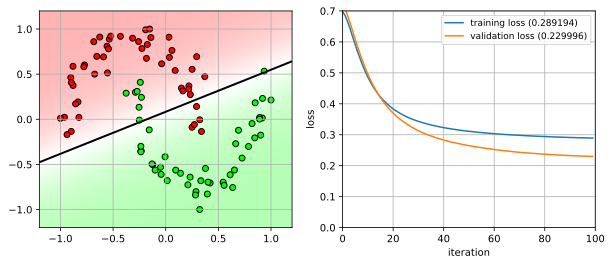

In [13]:
nnfig

- Add one 1 hidden layer with 2 ReLU nodes

In [14]:
# initialize random seed
random.seed(5489); tf.random.set_seed(4471)

# build the network
nn = Sequential()
nn.add(Dense(units=2,             # 2 nodes in the hidden layer
             input_dim=2, 
             activation='relu'))
nn.add(Dense(units=2,             # 2 output nodes (one for each class)
             activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.3, momentum=0.9, nesterov=True))
history = nn.fit(X, Yb, epochs=100, batch_size=32, validation_split=0.1, verbose=False)

- Add one 1 hidden layer with 2 ReLU nodes
  - can carve out part of the red class.

In [15]:
nnfig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_nn(nn, axbox, X, Y)
plt.subplot(1,2,2)
plot_history(history)
plt.close()

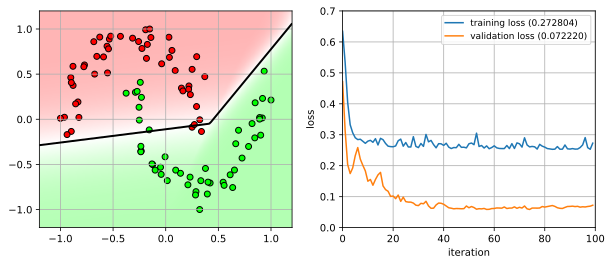

In [16]:
nnfig

- Let's try more nodes
  - 1 hidden layer with 20 hidden nodes

In [17]:
# initialize random seed
random.seed(4487); tf.random.set_seed(4487)

# build the network
nn = Sequential()
nn.add(Dense(units=20, input_dim=2, activation='relu'))
nn.add(Dense(units=2, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.SGD(lr=0.3, momentum=0.9, nesterov=True))
history = nn.fit(X, Yb, epochs=100, batch_size=32, validation_split=0.1, verbose=False)

- Let's try more nodes
  - 1 hidden layer with 20 hidden nodes
  - with enough nodes, we can get a perfect classifier.

In [18]:
nnfig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_nn(nn, axbox, X, Y)
plt.subplot(1,2,2)
plot_history(history)
plt.close()

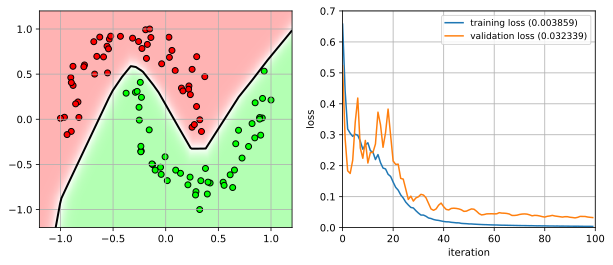

In [19]:
nnfig

# Overfitting
- Continuous training will sometimes lead to overfitting
  - the training loss decreases, but the validation loss increases

In [20]:
# initialize random seed
random.seed(248); tf.random.set_seed(3240)

# build the network
nn = Sequential()
nn.add(Dense(units=2, input_dim=2, activation='relu'))
nn.add(Dense(units=2, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.3, momentum=0.9, nesterov=True))
history = nn.fit(X, Yb, epochs=100, batch_size=32, validation_split=0.1, verbose=False)

In [21]:
nnfig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_nn(nn, axbox, X, Y)
plt.subplot(1,2,2)
plot_history(history)
plt.close()

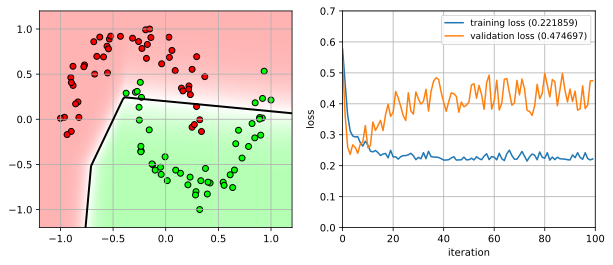

In [22]:
nnfig

# Early stopping

- Training can be stopped when the validation loss is stable for a number of iterations
  - stable means change below a threshold
  - this is to prevent overfitting the training data.
  - we can limit the number of iterations.
- *We are using the loss/accuracy on the (held-out) validation data to estimate the generalization performance of the network*

In [23]:
# initialize random seed
random.seed(248); tf.random.set_seed(3240)

# build the network
nn = Sequential()
nn.add(Dense(units=2, input_dim=2, activation='relu'))
nn.add(Dense(units=2, activation='softmax'))

# setup early stopping callback function
earlystop = keras.callbacks.EarlyStopping(
    monitor='val_loss',     # look at the validation loss
    min_delta=0.0001,       # threshold to consider as no change
    patience=5,             # stop if 5 epochs with no change
    verbose=1, mode='auto'
)
callbacks_list = [earlystop]

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.3, momentum=0.9, nesterov=True))
history = nn.fit(X, Yb, epochs=100, batch_size=32, validation_split=0.1, 
                 verbose=False, 
                 callbacks=callbacks_list)  # setup the callback list

Epoch 00009: early stopping


In [24]:
nnfig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_nn(nn, axbox, X, Y)
plt.subplot(1,2,2)
plot_history(history)
plt.close()

- training is stopped before overfitting begins.

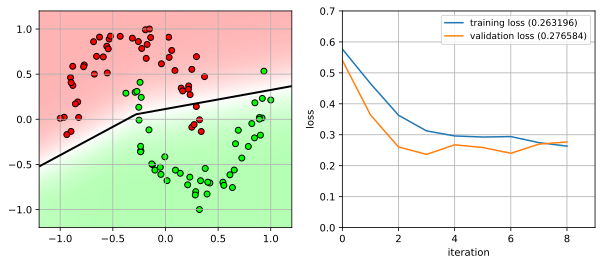

In [25]:
nnfig

# Universal Approximation Theorem
- Cybenko (1989), Hornik (1991)
  - _A multi-layer perceptron with a single hidden layer and a finite number of nodes can approximate any continuous function up to a desired error._
    - The number of nodes needed might be very large.
    - Doesn't say anything about how difficult it is to train it.

- *How many hidden nodes are needed?*
  - In the worst case, consider binary functions mapping $\{0,1\}^n \rightarrow \{0,1\}$
    - there are $2^n$ possible inputs.
    - there are $2^{2^n}$ possible functions (each input has 2 possible outputs)
    - thus, we need $2^n$ bits in the hidden layer to select one of these functions.
  - need $O(2^n)$ nodes in the hidden layer, exponential in the size of the input!


- *How to train this model?*
  - According to the "no free lunch theorem", there is no universally best learning algorithm!

- Deep learning corollary
  - *The number of functions representable by a deep network requires an exponential number of nodes for a shallow network with 1 hidden-layer.*
  - A deep network can learn the same function using less nodes.
  - Given the same number of nodes, a deep network can learn more complex functions.
- Doesn't say anything about how difficult it is to train it.

# Example
- Network with 1 hidden layer
  - input (2D) -> 40 hidden nodes -> output (2D)

In [26]:
X2 = vstack((X, X+array([1.2,0])))
Y2 = r_[Y, Y]
Y2b = keras.utils.to_categorical(Y2)
axbox2 = [-1.2, 2.5, -1.2, 1.2]

In [27]:
# initialize random seed
random.seed(4487); tf.random.set_seed(4487)

# build the network
nn = Sequential()
nn.add(Dense(units=40, input_dim=2, activation='relu'))
nn.add(Dense(units=2, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.4, momentum=0.9, nesterov=True))
history = nn.fit(X2, Y2b, epochs=100, batch_size=32, validation_split=0.1, verbose=False)

In [28]:
nnfig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_nn(nn, axbox2, X2, Y2)
plt.subplot(1,2,2)
plot_history(history)
plt.close()

In [29]:
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 82        
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________


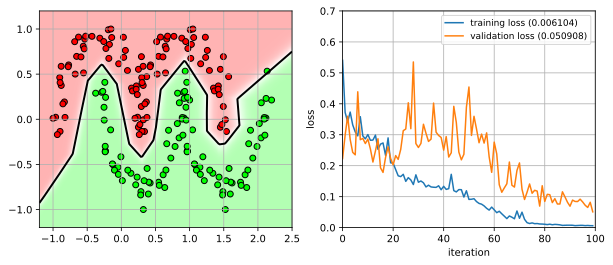

In [30]:
nnfig

- 3 hidden layers:
  - input (2D) -> 8 nodes -> 5 nodes -> 3 nodes -> output (2D)

In [31]:
# initialize random seed
random.seed(150); tf.random.set_seed(218)

# build the network
nn = Sequential()
nn.add(Dense(units=8, input_dim=2, activation='relu'))
nn.add(Dense(units=5, activation='relu'))
nn.add(Dense(units=3, activation='relu'))
nn.add(Dense(units=2, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True))
history = nn.fit(X2, Y2b, epochs=125, batch_size=32, validation_split=0.1, verbose=False)

In [32]:
nnfig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_nn(nn, axbox2, X2, Y2)
plt.subplot(1,2,2)
plot_history(history)
plt.close()

In [33]:
nn.summary()
# less parameters, similar classifier.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 8         
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


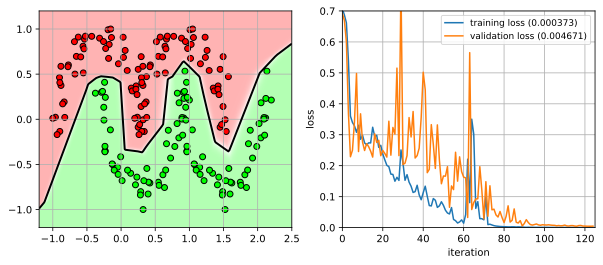

In [34]:
nnfig

# We should use deeper networks...
- Less parameters than a 1 hidden-layer NN 
  - but the number of parameters is still large
- Dataset is still too small.
- *Vanishing Gradient problem*
  - backprop recursively multiplies gradients
     - numerical values get smaller.
     - gradient signal is "washed" out the further back it travels.
- We'll see how to address these problems later.

# Example on MNIST Dataset
- Images are 28x28, digits 0-9
  - 6,000 for training
  - 10,000 for testing

In [35]:
def show_imgs(W_list, nc=10, highlight_green=None, highlight_red=None, titles=None):
    nfilter = len(W_list)
    nr = (nfilter - 1) // nc + 1
    for i in range(nr):
        for j in range(nc):
            idx = i * nc + j
            if idx == nfilter:
                break
            plt.subplot(nr, nc, idx + 1)
            cur_W = W_list[idx]
            plt.imshow(cur_W,cmap='gray', interpolation='nearest')  
            if titles is not None:
                plt.title(titles % idx)
            
            if ((highlight_green is not None) and highlight_green[idx]) or \
               ((highlight_red is not None) and highlight_red[idx]): 
                ax = plt.gca()
                if highlight_green[idx]:
                    mycol = '#00FF00'
                else:
                    mycol = 'r'
                for S in ['bottom', 'top', 'right', 'left']:
                    ax.spines[S].set_color(mycol)
                    ax.spines[S].set_lw(2.0)
                ax.xaxis.set_ticks_position('none')               
                ax.yaxis.set_ticks_position('none')
                ax.set_xticks([])
                ax.set_yticks([])
            else:
                plt.gca().set_axis_off()



In [36]:
def read_32int(f):
    return struct.unpack('>I', f.read(4))[0]
def read_img(img_path):
    with open(img_path, 'rb') as f:
        magic_num = read_32int(f)
        num_image = read_32int(f)
        n_row = read_32int(f)
        n_col = read_32int(f)
        #print 'num_image = {}; n_row = {}; n_col = {}'.format(num_image, n_row, n_col)
        res = []
        npixel = n_row * n_col
        res_arr = fromfile(f, dtype='B')
        res_arr = res_arr.reshape((num_image, n_row, n_col), order='C')
        #print 'image data shape = {}'.format(res_arr.shape)
        return num_image, n_row, n_col, res_arr    
def read_label(label_path):
    with open(label_path, 'rb') as f:
        magic_num = read_32int(f)
        num_label = read_32int(f)
        #print 'num_label = {}'.format(num_label)
        res_arr = fromfile(f, dtype='B')
        #print res_arr.shape
        #res_arr = res_arr.reshape((num_label, 1))
        res_arr = res_arr.ravel()
        #print 'label data shape = {}'.format(res_arr.shape)
        return num_label, res_arr

In [37]:
n_train, nrow, ncol, trainimg = read_img('data/train-images.idx3-ubyte')
_, trainY = read_label('data/train-labels.idx1-ubyte')
n_test, _, _, testimg = read_img('data/t10k-images.idx3-ubyte')
_, testY = read_label('data/t10k-labels.idx1-ubyte')

# for demonstration we only use 10% of the training data
sample_index = range(0, trainimg.shape[0], 10)
trainimg  = trainimg[sample_index]
trainY    = trainY[sample_index]
print(trainimg.shape)
print(trainY.shape)
print(testimg.shape)
print(testY.shape)

(6000, 28, 28)
(6000,)
(10000, 28, 28)
(10000,)


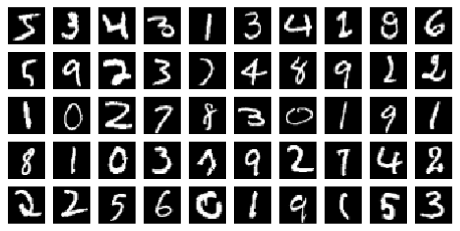

In [38]:
# Example images
plt.figure(figsize=(8,4))
show_imgs(trainimg[0:50])

# Pre-processing
- Reshape images into vectors
- map to [0,1], then subtract the mean

In [39]:
# Reshape the images to a vector
# and map the data to [0,1]
trainXraw = trainimg.reshape((len(trainimg), -1), order='C') / 255.0
testXraw = testimg.reshape((len(testimg), -1), order='C') / 255.0

# center the image data (but don't change variance)
scaler = preprocessing.StandardScaler(with_std=False)
trainX = scaler.fit_transform(trainXraw)
testX  = scaler.transform(testXraw)

# convert class labels to binary indicators
trainYb = keras.utils.to_categorical(trainY)

print(trainX.shape)
print(trainYb.shape)

(6000, 784)
(6000, 10)


- Generate a fixed validation set
  - use vtrainX for training and validX for validation

In [40]:
# generate a fixed validation set using 10% of the training set
vtrainX, validX, vtrainYb, validYb = \
  model_selection.train_test_split(trainX, trainYb, 
  train_size=0.9, test_size=0.1, random_state=4487)

# validation data
validset  = (validX, validYb)

# MNIST - Logistic Regression (0-hidden layers)
- Training procedure
  - We specify the validation set so that it will be fixed when we change the `random_state` to randomly initialize the weights.
  - Train on the non-validation training data.
  - Use a larger batch size to speed up the algorithm



In [41]:
def plot_history(history): 
    fig, ax1 = plt.subplots()
    
    ax1.plot(history.history['loss'], 'r', label="training loss ({:.6f})".format(history.history['loss'][-1]))
    ax1.plot(history.history['val_loss'], 'r--', label="validation loss ({:.6f})".format(history.history['val_loss'][-1]))
    ax1.grid(True)
    ax1.set_xlabel('iteration')
    ax1.legend(loc="best", fontsize=9)    
    ax1.set_ylabel('loss', color='r')
    ax1.tick_params('y', colors='r')

    if 'accuracy' in history.history:
        ax2 = ax1.twinx()

        ax2.plot(history.history['accuracy'], 'b', label="training acc ({:.4f})".format(history.history['accuracy'][-1]))
        ax2.plot(history.history['val_accuracy'], 'b--', label="validation acc ({:.4f})".format(history.history['val_accuracy'][-1]))

        ax2.legend(loc="best", fontsize=9)
        ax2.set_ylabel('acc', color='b')        
        ax2.tick_params('y', colors='b')

In [42]:
K.clear_session()  # cleanup
random.seed(4487); tf.random.set_seed(4487) # initialize seed

# build the network
nn = Sequential()
nn.add(Dense(units=10, input_dim=784, activation='softmax'))

# early stopping criteria
earlystop = keras.callbacks.EarlyStopping(
               monitor='val_accuracy',    # use validation accuracy for stopping
                                          # (use 'val_acc' for tf1)
               min_delta=0.0001, patience=5, 
               verbose=1, mode='auto')
callbacks_list = [earlystop]

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.9, nesterov=True), 
           metrics=['accuracy']  # also calculate accuracy during training
          )

history = nn.fit(vtrainX, vtrainYb, epochs=100, batch_size=50, 
                 callbacks=callbacks_list, 
                 validation_data=validset,  # specify the validation set
                 verbose=False)

Epoch 00014: early stopping


test accuracy: 0.8905


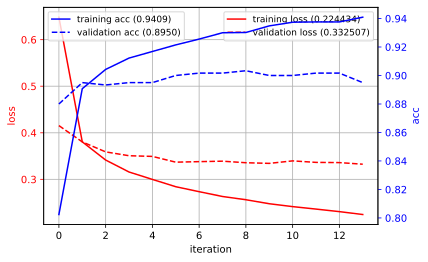

In [43]:
plot_history(history)

predY = argmax(nn.predict(testX, verbose=False), axis=-1)
acc = metrics.accuracy_score(testY, predY)
print("test accuracy:", acc)

- Examine the weights of the network
  - use `get_layer` to access indexed layer in the network
    - layer 0 is the input layer.
  - use `get_weights` to get the weights/biases for a layer.

In [44]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [45]:
params = nn.get_layer(index=0).get_weights()
print(params)

[array([[-0.00957992, -0.02938809, -0.0745469 , ..., -0.00216463,
        -0.07690337,  0.00644093],
       [-0.0137912 , -0.03938979,  0.01985522, ...,  0.0103862 ,
        -0.02178642, -0.02393435],
       [-0.08034424,  0.04140151,  0.00698015, ...,  0.02074677,
         0.00574041,  0.06866024],
       ...,
       [ 0.02580537, -0.06060974, -0.01341244, ..., -0.01986379,
         0.03478144,  0.03219859],
       [-0.01948792,  0.08509646, -0.06631447, ..., -0.0780739 ,
         0.0027025 , -0.00181095],
       [-0.03740928, -0.03242527,  0.01223797, ..., -0.07883625,
         0.01763383,  0.00632311]], dtype=float32), array([-1.1740438 , -1.4647288 ,  0.5527088 ,  0.5970227 , -0.7663698 ,
        0.92062616, -0.62901175, -0.5537174 ,  1.7259952 ,  0.791519  ],
      dtype=float32)]


- Reshape the weights into an image
  - input images that match the weights will have high response for that class.

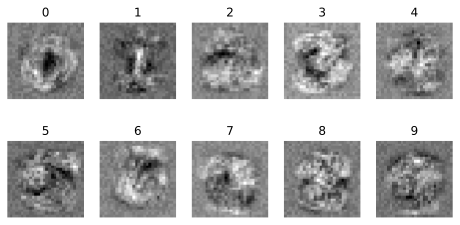

In [46]:
W = params[0]
filter_list = [W[:,i].reshape((28,28)) for i in range(W.shape[1])]
plt.figure(figsize=(8,4))
show_imgs(filter_list, nc=5, titles="%d")

# MNIST - 1-hidden layer
- Add 1 hidden layer with 50 ReLu nodes
  - each node is extracting a feature from the input image

In [47]:
K.clear_session()  # cleanup
random.seed(4487); tf.random.set_seed(4487) # initialize seed

# build the network
nn = Sequential()
nn.add(Dense(units=50, input_dim=784, activation='relu')) # hidden layer
nn.add(Dense(units=10, activation='softmax'))  # output layer

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True), 
           metrics=['accuracy'])
history = nn.fit(vtrainX, vtrainYb, epochs=100, batch_size=50, 
                 callbacks=callbacks_list, 
                 validation_data=validset, verbose=False)

Epoch 00012: early stopping


In [48]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


test accuracy: 0.9382


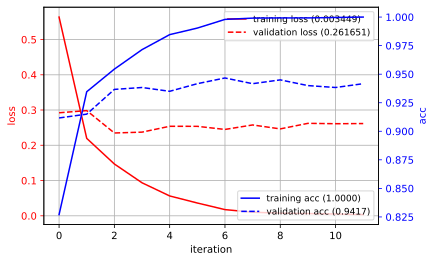

In [49]:
plot_history(history)

predY = argmax(nn.predict(testX, verbose=False), axis=-1)
acc = metrics.accuracy_score(testY, predY)
print("test accuracy:", acc)

- Examine the weights of the hidden layer
  - $h_i = \sigma(\mathbf{w}_i^T \mathbf{x})$
  - each weight vector is a "pattern prototype" that the node will match
- The hidden nodes look for local structures:
  - oriented edges, curves, other local structures

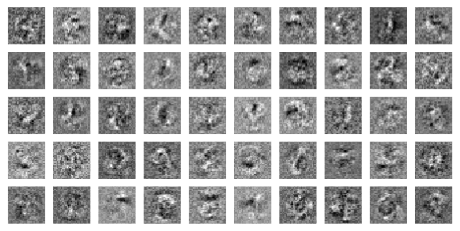

In [50]:
W = nn.get_layer(index=0).get_weights()[0]
filter_list = [W[:,i].reshape((28,28)) for i in range(W.shape[1])]
plt.figure(figsize=(8,4))
show_imgs(filter_list, nc=10)

- Examine the weights of the 2nd layer (output)
  - $y_j = \sigma(\mathbf{w}_j^T\mathbf{h})$
  - recall the hidden-layer outputs $h$ are always non-negative.
    - positive value in $\mathbf{w}_j$ $\rightarrow$ class $j$ should have j-th pattern
    - negative value in $\mathbf{w}_j$ $\rightarrow$ class $j$ shouldn't have j-th pattern

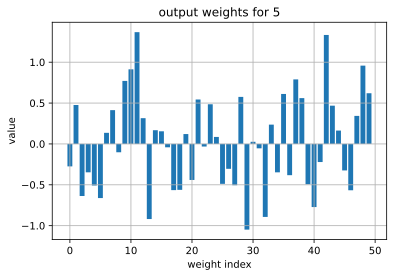

In [51]:
W = nn.get_layer(index=1).get_weights()[0]
d = 5
plt.bar(arange(0,W.shape[0]),W[:,d]); plt.grid(True);
plt.xlabel('weight index'); plt.ylabel('value')
plt.title('output weights for {}'.format(d));

- For "5", finds local image parts that correspond to 5
  - should have (green boxes):
    - horizontal line at top; semicircle on the bottom
  - shouldn't have (red boxes):
    - vertical line in top-right; verticle line in the middle

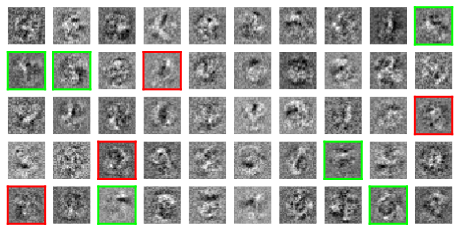

In [52]:
plt.figure(figsize=(8,4))
show_imgs(filter_list, nc=10,
          highlight_green=(W[:,d]>0.75), # positive weights are green
          highlight_red=(W[:,d]<-0.75))  # negative weights are red

# 1 Hidden layer with more nodes
- hidden layer with 200 nodes

In [53]:
K.clear_session()  # cleanup
random.seed(4487); tf.random.set_seed(4487)  # initialize seed

# build the network
nn = Sequential()
nn.add(Dense(units=200, input_dim=784, activation='relu'))
nn.add(Dense(units=10, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True), 
           metrics=['accuracy'])
history = nn.fit(vtrainX, vtrainYb, epochs=100, batch_size=50, 
                 callbacks=callbacks_list, 
                 validation_data=validset, verbose=False)

Epoch 00008: early stopping


In [54]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


test accuracy:  0.9448


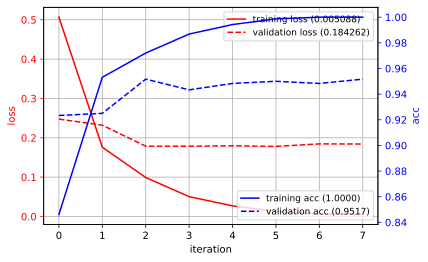

In [55]:
plot_history(history)
predY = argmax(nn.predict(testX, verbose=False), axis=-1)
acc = metrics.accuracy_score(testY, predY)
print("test accuracy: ", acc)

- hidden layer with 1000 nodes

In [56]:
K.clear_session()  # cleanup
random.seed(4487); tf.random.set_seed(4487)  # initialize seed

# build the network
nn = Sequential()
nn.add(Dense(units=1000, input_dim=784, activation='relu'))
nn.add(Dense(units=10, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True), 
          metrics=['accuracy'])
history = nn.fit(vtrainX, vtrainYb, epochs=100, batch_size=50, 
                 callbacks=callbacks_list, 
                 validation_data=validset, verbose=False)

Epoch 00010: early stopping


In [57]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


test accuracy: 0.948


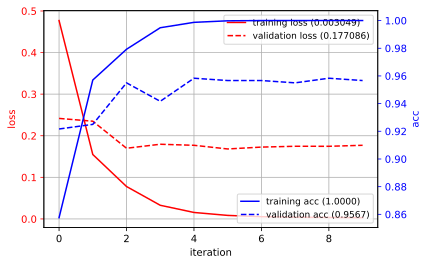

In [58]:
plot_history(history)
predY = argmax(nn.predict(testX, verbose=False), axis=-1)
acc = metrics.accuracy_score(testY, predY)
print("test accuracy:", acc)

- 2 hidden layers
  - input (28x28) -> 500 nodes -> 500 nodes -> output
  - Slightly better

In [59]:
K.clear_session()  # cleanup
random.seed(4487); tf.random.set_seed(4487)  # initialize seed

# build the network
nn = Sequential()
nn.add(Dense(units=500, input_dim=784, activation='relu'))
nn.add(Dense(units=500, activation='relu'))
nn.add(Dense(units=10, activation='softmax'))

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True), 
          metrics=['accuracy'])
history = nn.fit(vtrainX, vtrainYb, epochs=100, batch_size=50, 
                 callbacks=callbacks_list, 
                 validation_data=validset, verbose=False)

Epoch 00016: early stopping


In [60]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


test accuracy: 0.9499


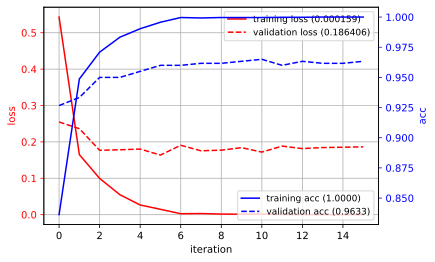

In [61]:
plot_history(history)
predY = argmax(nn.predict(testX, verbose=False), axis=-1)
acc = metrics.accuracy_score(testY, predY)
print("test accuracy:", acc)

# Comparison on MNIST
- Performance is saturated.
<center><table style="font-size:10pt;">
<tr>
  <th>Type</th>
  <th>No.Layers</th>
  <th>Architecture</th>
  <th>No.Parameters</th>
  <th>Test Accuracy</th>
</tr><tr>
  <td>LR</td>
  <td>1</td>
  <td>output(10)</td>
  <td>7,850</td>
  <td>0.8905</td>
</tr><tr>
  <td>MLP</td>
  <td>2</td>
  <td>ReLu(50), output(10)</td>
  <td>39,760</td>
  <td>0.9382</td>
</tr><tr>
  <td>MLP</td>
  <td>2</td>
  <td>Relu(200), output(10)</td>
  <td>159,010</td>
  <td>0.9448</td>
</tr><tr>
  <td>MLP</td>
  <td>2</td>
  <td>Relu(1000), output(10)</td>
  <td>795,010</td>
  <td>0.9480</td>
</tr><tr>
  <td>MLP</td>
  <td>3</td>
  <td>ReLu(500), Relu(500), output(10)</td>
  <td>648,010</td>
  <td>0.9499</td>
</tr>
</table></center>

# Summary
- **Different types of neural networks**
  - _Perceptron_ - single node (similar to logistic regression)
  - _Multi-layer perceptron (MLP)_ - collection of perceptrons in layers
    - also called _fully-connected layers_ or _dense layers_
- **Training**
  - optimize loss function using stochastic gradient descent

- **Advantages**
  - lots of parameters - large capacity to learn from large amounts of data
- **Disadvantages**
  - lots of parameters - easy to overfit data
    - need to monitor the training process
  - sensitive to initialization, learning rate, training algorithm.

# Other things
- **Numerical stability**
  - normalize the inputs to [-1,1] or [0,1]
- **Improving speed**
  - parallelize computations using GPU (Nvidia+CUDA)
- **Initialization**
  - the resulting network is still sensitive to initialization.
    - Solution: train several networks and combine them as an ensemble.
- **Training problems**
  - For very deep networks, the "vanishing gradient" problem can hinder convergence
  - lack of data
  - We will see how to address these problems later.

# References

- Software
  - Tensorflow (Google)- https://www.tensorflow.org
  - Keras - https://keras.io
    - Easy-to-use front-end for deep learning
    - now included with tensorflow
    - API Documentation: https://keras.io/layers/core/
  - see Canvas site for installation tips.

- History:
  - http://www.andreykurenkov.com/writing/a-brief-history-of-neural-nets-and-deep-learning/

- Keras tutorials:
  - https://elitedatascience.com/keras-tutorial-deep-learning-in-python
  - https://blog.keras.io

- Online courses::
  - http://cs231n.github.io/neural-networks-1/
  - http://cs231n.github.io/convolutional-networks/